# [셀프 1] grocery 장바구니 분석

## 1.1 grocery 데이터 적재

In [57]:
# 1.1 grocery 데이터 적재
# grocery 데이터를 github로 부터 읽어 들이고 내용물을 확인한다. 
# pandas의 read_csv 함수를 사용한다. 

import pandas as pd

path = 'https://github.com/sagelab4data/kdata_yonsei/blob/main/groceries.csv?raw=true'
grocery_csv = pd.***(path, header = None)
grocery_csv.tail()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,chicken,tropical fruit,other vegetables,vinegar,shopping bags,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2 grocery 데이터 가공
* apyori에서 분석 가능한 리스트 형태로 변환

In [58]:
# 1.2 grocery 데이터 가공
# grocery 데이터를 apyori 라이브러리에서 사용 할 수 있는 형태인 
# 리스트 형태로 변환한다. 
# DataFramd의 행단위 순회 메소드 .iterrows()--> idx, row_series 

grocery_list = [ *** for   in  ]

# 마지막 3개 리스트 출력
***

([['chicken',
   'citrus fruit',
   'other vegetables',
   'butter',
   'yogurt',
   'frozen dessert',
   'domestic eggs',
   'rolls/buns',
   'rum',
   'cling film/bags'],
  ['semi-finished bread', 'bottled water', 'soda', 'bottled beer'],
  ['chicken',
   'tropical fruit',
   'other vegetables',
   'vinegar',
   'shopping bags']],)

## 1.3 트랜잭션과 항목수 확인

In [59]:
# 1.3 전체 거래건수와  항목수를 확인해보자.
# 1.3.1 트랜젝션수

N = ***



In [60]:
# 1.3.2 항목수 
k = ***

In [61]:
# 1.3.3 출력

print(f'거래 건수 N :{N}, 항목 개수 k: {k}')

거래 건수 N :9835, 항목 개수 k: 169


## 1.4 apyori 라이브러리와 출력함수 정의

In [62]:
# 1.4 apyori 라이브러리 준비와 출력함수 print_rr 정의 (수업 내용 복습)
# apyori 라이브러리를 이용해서 가장 지지도가 높은 항목을 찾아보자. 
# 1.4.1 라이브러리 설치 및 import. 

!pip install apyori
import apyori as ap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
# 1.4.2 RelationRecord 출력을 위한 함수 

def print_rr(rr) :
  lhs = set(rr[2][0][0])
  rhs = set(rr[2][0][1])
  support = rr[1]
  confidence = rr[2][0][2]
  lift = rr[2][0][3]
  print (f'{lhs}=>{rhs}, support={support:.2f},',\
         f'confidence={confidence:.2f}, lift={lift:.2f} ')



In [64]:
# 1.4.3 apiori 함수를 이용해서 가장 지지도가 높은 항목을 찾아본다.
# 최소신뢰도를 지정하지 않고 수행하면 지지도에 의해 목록이 결정된다.
#  일단 최소 지지도 0.1로 try

rules = ***

# for 문 이용해서 출력
***

set()=>{'bottled water'}, support=0.11, confidence=0.11, lift=1.00 
set()=>{'other vegetables'}, support=0.19, confidence=0.19, lift=1.00 
set()=>{'rolls/buns'}, support=0.18, confidence=0.18, lift=1.00 
set()=>{'root vegetables'}, support=0.11, confidence=0.11, lift=1.00 
set()=>{'soda'}, support=0.17, confidence=0.17, lift=1.00 
set()=>{'tropical fruit'}, support=0.10, confidence=0.10, lift=1.00 
set()=>{'whole milk'}, support=0.26, confidence=0.26, lift=1.00 
set()=>{'yogurt'}, support=0.14, confidence=0.14, lift=1.00 


## 1.5 적정 지지도 탐색
- 최소지지도가 1% 이상인 상품(항목) 건수는? 2%, 3%...? 

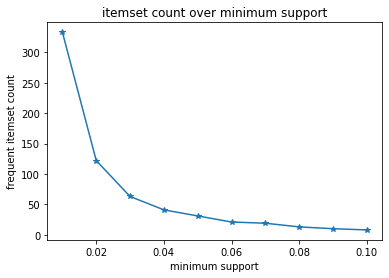

In [65]:
# 1.5  적절한 최소지지도를 선정하고 이를 관찰해본다. 
# 1.5.1 적절한 지지도의 상품 개수가 되도록 찾아본다.  (0.01 ~ 0.1)

# 라이브러리 import numpy, matplotlib.pyplot
***

# 최소 지지도 출력 범위 (0.01~0.10, 0.01 단위로 )
min_sup_range =  ***

# min_sup_range 를 최소지지도로 빈발항목 생성 및 개수 세어 
# frequent_itemsets_count에 저장 

***

# 지지도별 상품 건수 꺾은선 그래프로 출력
***


In [66]:
#[참고] 상기 frequent_itemsets_count의 for문은 다음과 같이 작성 할 수 있다. 
frequent_itemsets_count =[ len(list(ap.apriori(grocery_list, min_support= ms)))
                           for ms in min_sup_range]

* 트랜잭션 9835 건, 항목개수 169개
* 0.01에서 300건 이상, 0.02에서 120건 전후의 빈발항목이 관찰된다. 
* 최소지지도 0.02를 후보로 두고 0.02의 빈발항목 관찰

### 최소지지도 0.02에서 121건 빈발항목

In [67]:
# 1.5.2 최소지지도 0.02의 목록을 관찰해보자. 

# 최소신뢰도 0.02의 빈발항목 생성
rules_lst = list(ap.apriori(grocery_list, min_support= 0.02))

# 빈발항목 건수 출력
**

# for 문을 이용하여 규칙을 출력 
# (enumerate를 이용하여 일련번호도 함께 출력)
**

min sup : 0.02,  min conf : N/A
rule count : 122
0 : set()=>{'UHT-milk'}, support=0.03, confidence=0.03, lift=1.00 
1 : set()=>{'beef'}, support=0.05, confidence=0.05, lift=1.00 
2 : set()=>{'berries'}, support=0.03, confidence=0.03, lift=1.00 
3 : set()=>{'beverages'}, support=0.03, confidence=0.03, lift=1.00 
4 : set()=>{'bottled beer'}, support=0.08, confidence=0.08, lift=1.00 
5 : set()=>{'bottled water'}, support=0.11, confidence=0.11, lift=1.00 
6 : set()=>{'brown bread'}, support=0.06, confidence=0.06, lift=1.00 
7 : set()=>{'butter'}, support=0.06, confidence=0.06, lift=1.00 
8 : set()=>{'butter milk'}, support=0.03, confidence=0.03, lift=1.00 
9 : set()=>{'candy'}, support=0.03, confidence=0.03, lift=1.00 
10 : set()=>{'canned beer'}, support=0.08, confidence=0.08, lift=1.00 
11 : set()=>{'cat food'}, support=0.02, confidence=0.02, lift=1.00 
12 : set()=>{'chewing gum'}, support=0.02, confidence=0.02, lift=1.00 
13 : set()=>{'chicken'}, support=0.04, confidence=0.04, lift=1.00

## 1.6 연관분석 

In [68]:
# 1.6 최소지지도를 0.02로 하고 최소 신뢰도의 적정 범위를 찾아보자.
# 1.6.1  최소지지도 0.02, 최소신뢰도 0.5로 도출되는 규칙의 수를 확인한다. 

# 연관규칙 생성
rules_lst = ***


# 건수 확인
***

1

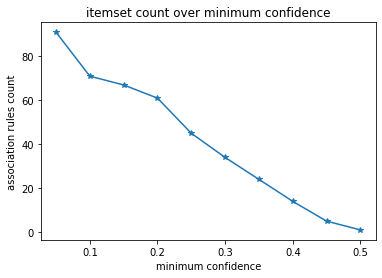

In [69]:
# 1.6.2 최소신뢰도를 0.05~ 0.5 사이의 값으로 변경하며 
#       도출되는 규칙의 수를 확인한다.

# 최소신뢰도 후보 범위 지정
min_conf_range =  ***

# 최소신뢰도 별 연관규칙 생성 건수 목록 
association_rules_count =[ *** ]

# 그래프 출력
plt.plot (***, ***, marker = '*')
plt.title (***)
plt.xlabel('***')
plt.ylabel('***')
plt.show()

#### 최소지지도 0.02 최소신뢰도 0.3에서 33건 연관규칙

In [70]:
# 1.6.3 최소지지도 0.02, 최소신뢰도 0.3의 목록을 관찰해보자. 

# 연관규칙 생성
rules_lst = list(ap.apriori(grocery_list, min_support= ***, 
                            min_confidence = ***))
# 연관규칙 건수 출력
print('min sup : 0.02,  min conf : 0.3')
print(f'rule count : {len(rules_lst)}')

# 연관규칙 출력 (항목번호와 함께)
for i, rr in enumerate(rules_lst):
  print(i, end=' : ')
  print_rr(rr)

min sup : 0.02,  min conf : 0.3
rule count : 34
0 : {'beef'}=>{'whole milk'}, support=0.02, confidence=0.41, lift=1.59 
1 : {'bottled water'}=>{'whole milk'}, support=0.03, confidence=0.31, lift=1.22 
2 : {'brown bread'}=>{'whole milk'}, support=0.03, confidence=0.39, lift=1.52 
3 : {'butter'}=>{'other vegetables'}, support=0.02, confidence=0.36, lift=1.87 
4 : {'butter'}=>{'whole milk'}, support=0.03, confidence=0.50, lift=1.95 
5 : {'citrus fruit'}=>{'other vegetables'}, support=0.03, confidence=0.35, lift=1.80 
6 : {'citrus fruit'}=>{'whole milk'}, support=0.03, confidence=0.37, lift=1.44 
7 : {'curd'}=>{'whole milk'}, support=0.03, confidence=0.49, lift=1.92 
8 : {'domestic eggs'}=>{'other vegetables'}, support=0.02, confidence=0.35, lift=1.81 
9 : {'domestic eggs'}=>{'whole milk'}, support=0.03, confidence=0.47, lift=1.85 
10 : {'frankfurter'}=>{'whole milk'}, support=0.02, confidence=0.35, lift=1.36 
11 : {'frozen vegetables'}=>{'whole milk'}, support=0.02, confidence=0.42, lift=

In [ ]:
# 1.6.4 최소지지도 0.02, 최소신뢰도 0.3,  향상도 2 이상의 목록을 관찰해보자. 

# 리프트 값도 min_lift로 지정하여 연관 규칙 생성
rules_lst = list(ap.apriori(grocery_list, 
                            ***))

# 연관규칙 건수 출력
print('min sup : 0.02,  min conf : 0.3, ****')
print(f'rule count : {len(rules_lst)}')

# 연관규칙 출력 (항목번호와 함께)
for i, rr in enumerate(rules_lst):
  print(i, end=' : ')
  print_rr(rr)

## [선택] 1.7 yougurt 관련 연관

In [ ]:
# 1.7 yogurt와 관련된 연관 규칙을 찾아보자.  
#     최소 지지도  0.02, 최소 신뢰도 0.3 으로 관찰한다. 

# 규칙생성
rules_lst = list(ap.apriori(grocery_list, 
                            min_support= 0.02, 
                            min_confidence = 0.3))

# yogurt가 포함된 목록만 추출
rules_lst = ***

# 연관규칙 건수 출력
print('min sup : 0.02,  min conf : 0.3, yogurt related only')
print(f'rule count : {len(rules_lst)}')

# 연관규칙 출력 (항목번호와 함께)
for i, rr in enumerate(rules_lst):
  print(i, end=' : ')
  print_rr(rr)

## [선택] 1.8 신뢰도 Top3 탐색 @ 최소지지도 0.02

In [ ]:
# 1.8 최소지지도 0.02 에서 신뢰도가 가장 높은 3개의 규칙을 찾아보자. 
# hint > 1.6.2의 그래프로 적정 건수가 되는 신뢰도를 추정해보자. 

# 규칙생성
rules_lst = list(ap.apriori(grocery_list, min_support= ***, 
                            min_confidence = ***))
# 연관규칙 건수 출력
print('min sup : ***,  min conf : ***')
print(f'rule count : {len(rules_lst)}')

# 연관규칙 출력 (항목번호와 함께)
for i, rr in enumerate(rules_lst):
  print(i, end=' : ')
  print_rr(rr)